In [22]:
using CSV
using DataFrames
using Plots

In [23]:
function plot_benchmarks(df::DataFrame)
    # Define all possible combinations of input_dim x obs_dim x latent_dim
    input_dims = unique(df.input_dim)
    obs_dims = unique(df.obs_dim)
    latent_dims = unique(df.latent_dim)
    full_dim_combos = [string(inp, "x", obs, "x", lat) for inp in input_dims, obs in obs_dims, lat in latent_dims]
    
    # Define 9 unique markers
    base_markers = [:circle, :square, :diamond, :utriangle, :dtriangle, :star5, :hexagon, :pentagon, :cross]
    marker_dict = Dict(combo => base_markers[i] for (i, combo) in enumerate(full_dim_combos))
    
    # Define a mapping between package names and color indices
    package_colors = Dict(
        "Dynamax" => 2,  # Color index 1
        "HMM.jl" => 7,   # Color index 2
        "SSD.jl" => 1    # Color index 3
    )
    
    # Initialize the plot
    p = plot(
        xlabel="log(Sequence Length)",
        ylabel="log(Runtime (s))",
        title="Bernoulli HMM-GLM Benchmark",
        legend=:outertopright,
        xscale=:log10,
        yscale=:log10
    )
    
    # Plot each package with its own line color from the default palette
    packages = unique(df.package)
    
    # Iterate over each package and plot it with the corresponding color
    for pkg in packages
        pkg_data = df[df.package .== pkg, :]
        
        # Get the color index for the package
        package_color = get(package_colors, pkg, 1)  # Default to color index 1 if not specified
        
        # Iterate over all possible combinations
        for dim_combo in full_dim_combos
            # Extract the data for this specific dimension combination
            inp_obs_lat_split = split(dim_combo, "x")
            input_dim, obs_dim, latent_dim = 
                parse(Int, inp_obs_lat_split[1]), 
                parse(Int, inp_obs_lat_split[2]), 
                parse(Int, inp_obs_lat_split[3])
            
            combo_data = pkg_data[
                (pkg_data.input_dim .== input_dim) .& 
                (pkg_data.obs_dim .== obs_dim) .& 
                (pkg_data.latent_dim .== latent_dim), :
            ]
            
            if !isempty(combo_data)
                plot!(
                    p,
                    combo_data.seq_length,
                    combo_data.time,
                    label="$(pkg) ($dim_combo)",
                    color=package_color,  # Use the color from the mapping
                    marker=marker_dict[dim_combo],  # Unique marker for each combination
                    markersize=6,
                    markerstrokewidth=1
                )
            end
        end
    end
    
    # Add gridlines and adjust layout
    plot!(
        p,
        grid=true,
        minorgrid=true,
        size=(900, 600),
        margin=10Plots.mm
    )
    
    return p
end


plot_benchmarks (generic function with 1 method)

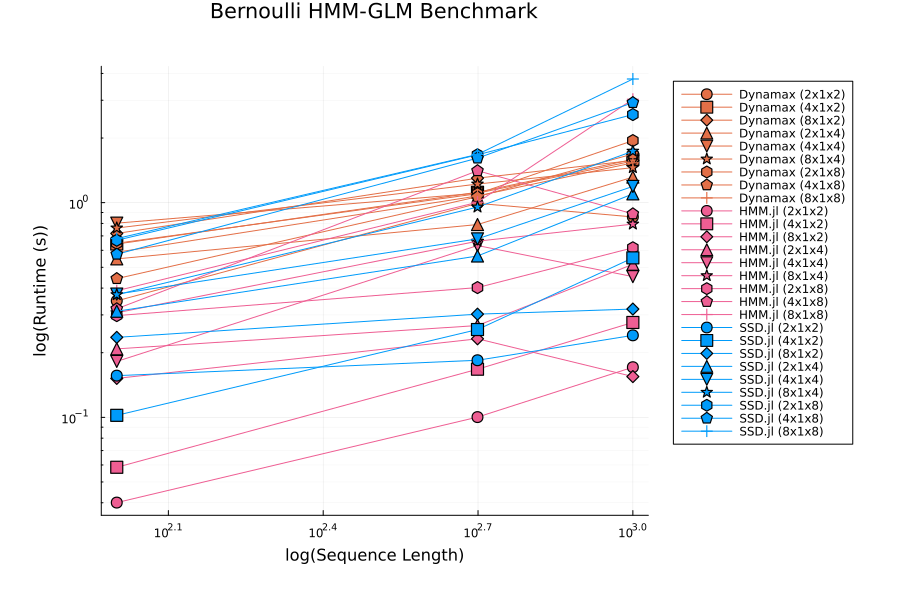

"c:\\Users\\zachl\\OneDrive\\Documents\\GitHub\\StateSpaceDynamics.jl\\benchmarking\\SwitchingBernoulli_Benchmark_Plot.pdf"

In [24]:
# Import the data
file_path = "C:\\Users\\zachl\\OneDrive\\Documents\\GitHub\\StateSpaceDynamics.jl\\benchmarking\\SwitchingBernoulli_Benchmark_DF.csv"  # Replace with actual path
benchmark_data = CSV.read(file_path, DataFrame)

# Generate the plot
p = plot_benchmarks(benchmark_data)

# Display or save the plot
display(p)
savefig(p, "SwitchingBernoulli_Benchmark_Plot.pdf")
